In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('D:/Data Visualization Project/style-table.css').read() + open('D:/Data Visualization Project/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('D:/Data Visualization Project/titles.csv')
titles.head()

,title,year
0,Captain of His Soul,1918
1,Qing chun xing,1975
2,Tangled Web (II),2008
3,The Shepherd of the Hills,1919
4,Anna mit'n Flimmerfimmel,1919


In [4]:
cast = pd.read_csv('D:/Data Visualization Project/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [6]:
diff = c.Superman - c.Batman
print('Superman years:')
print(len(diff[diff > 0.0]))

Superman years:
11


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
diff = c.Batman - c.Superman
print('Batman years:')
print(len(diff[diff > 0.0]))

Batman years:
26


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

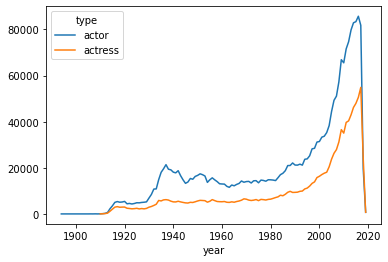

In [11]:
c = cast
c = c[c.year < 2020]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

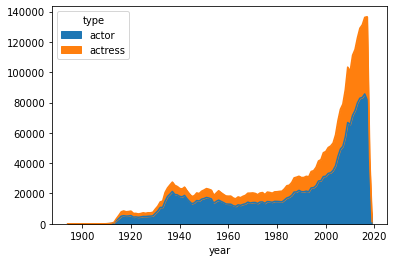

In [12]:
c = cast
c = c[c.year < 2020]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

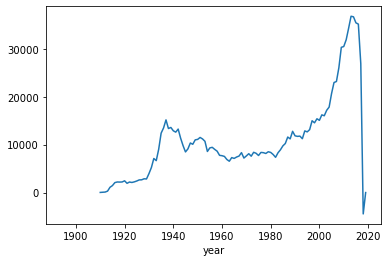

In [13]:
c = cast
c = c[c.year < 2020]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

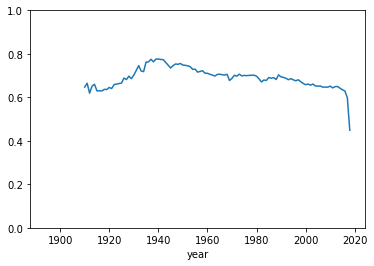

In [18]:
c = cast
c = c[c.year < 2019]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor/(c.actor + c.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

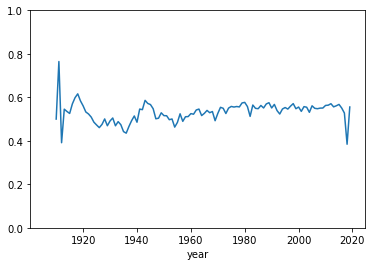

In [19]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor/(c.actor + c.actress)).plot(ylim = [0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

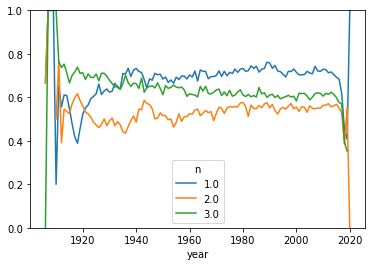

In [20]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])